<a href="https://colab.research.google.com/github/AisyahFaradilaFatah/Memprediksi-Lama-Proses-Tindakan-Sejak-Kunjungan-Awal-Data-studi-kasus-BPJS-Kesehatan-Tahun-2022/blob/main/Aisyah_Faradila_Fatah_UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pembuatan Model Regresi dengan Algoritma Korelasi Pearson dan Mutual Information untuk Memprediksi Durasi Penyelesaian Kunjungan**

Aisyah Faradila Fatah

2308292



*   Dataset: reguler_nonkapitasi BPJS Kesehatan Tahun 2022
*   Target: Durasi Penyelesaian Kunjungan (FKL04–FKL03)
*   Jenis: Regresi



Dataset ini dipilih karena atribut atau kolomnya yang cukup, tidak sebanyak FKRTL karena sudah mencoba FKRTL tetapi stuck saat visualisasi data karena terlalu banyak baris dan kolom serta tidak terlalu sedikit sehingga data masih bisa belajar. Juga dataset ini sudah lebih bersih dibanding dataset FKRTL. Alasan lainnya karena durasi penyelesaian kunjungan menggambarkan efisiensi pelayanan di fasilitas kesehatan. Faskes yang terlalu lama menangani pasien bisa menunjukkan overload, diagnosis kompleks, atau keterlambatan administrasi

# Input dan Membaca Data

Import library

In [ ]:
import pandas as pd
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib
from google.colab import files

Mount Google Drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/reguler_nonkapitasi.csv")

Cek seluruh data

In [ ]:
df

,Unnamed: 0,PSTV01,PSTV02,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK06,PNK07,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,0,58535615,39540462,0.949749,140270421P000283,2021-04-18,2021-04-20,2021-04-20,JAWA TIMUR,KAB. LAMONGAN,...,KLINIK RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A01,Typhoid and paratyphoid fevers,Rawat Inap di R. Perawatan Biasa,360000,360000
1,1,72754862,72754862,6.303136,88220121P001458,2021-01-26,2021-01-29,2021-01-29,JAWA TIMUR,KAB. BANGKALAN,...,RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,540000,540000
2,2,390220748,401640722,24.871052,433810421P000084,2021-04-30,2021-05-02,2021-05-02,JAWA TIMUR,KAB. TRENGGALEK,...,KLINIK RAWAT INAP,RITP,PBPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,360000,360000
3,3,61351881,64119870,18.174042,199281021P000077,2021-10-02,2021-10-04,2021-10-04,LAMPUNG,KAB. TANGGAMUS,...,KLINIK RAWAT INAP,RITP,PBI APBD,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,400000,400000
4,4,20965023,20965023,45.487633,420800621P000260,2021-06-09,2021-06-13,2021-06-13,ACEH,KAB. ACEH UTARA,...,KLINIK RAWAT INAP,RITP,BUKAN PEKERJA,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,660000,660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95612,95612,438996547,438996547,13.705892,373830621P000091,2021-06-11,2021-06-11,2021-06-11,SULAWESI TENGGARA,KAB. KOLAKA,...,RAWAT INAP,RJTP,PBPU,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Suntik,15000,15000
95613,95613,61825525,190143242,50.320034,16910221P001702,2021-02-24,2021-02-24,2021-02-24,NUSA TENGGARA BARAT,KOTA BIMA,...,RAWAT INAP,RJTP,PPU,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Pemasangan IUD / Implant,100000,100000
95614,95614,218096673,218096620,250.536970,276980921P000244,2021-09-22,2021-09-22,2021-09-22,SULAWESI SELATAN,KAB. SINJAI,...,RAWAT INAP,RJTP,PBI APBD,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Cabut IUD / Implant,100000,100000
95615,95615,150819614,150819601,312.740600,184231021P000693,2021-10-14,2021-10-14,2021-10-14,SULAWESI SELATAN,KAB. BANTAENG,...,RAWAT INAP,RJTP,PBI APBN,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Cabut IUD / Implant,100000,100000


Cek 5 baris awal untuk gambaran data

In [ ]:
df.head()

,Unnamed: 0,PSTV01,PSTV02,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK06,PNK07,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,0,58535615,39540462,0.949749,140270421P000283,2021-04-18,2021-04-20,2021-04-20,JAWA TIMUR,KAB. LAMONGAN,...,KLINIK RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A01,Typhoid and paratyphoid fevers,Rawat Inap di R. Perawatan Biasa,360000,360000
1,1,72754862,72754862,6.303136,88220121P001458,2021-01-26,2021-01-29,2021-01-29,JAWA TIMUR,KAB. BANGKALAN,...,RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,540000,540000
2,2,390220748,401640722,24.871052,433810421P000084,2021-04-30,2021-05-02,2021-05-02,JAWA TIMUR,KAB. TRENGGALEK,...,KLINIK RAWAT INAP,RITP,PBPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,360000,360000
3,3,61351881,64119870,18.174042,199281021P000077,2021-10-02,2021-10-04,2021-10-04,LAMPUNG,KAB. TANGGAMUS,...,KLINIK RAWAT INAP,RITP,PBI APBD,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,400000,400000
4,4,20965023,20965023,45.487633,420800621P000260,2021-06-09,2021-06-13,2021-06-13,ACEH,KAB. ACEH UTARA,...,KLINIK RAWAT INAP,RITP,BUKAN PEKERJA,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,660000,660000


# Eksplorasi Data Awal

Jumlah baris dan kolom

In [ ]:
print(df.shape)

(95617, 22)


Informasi dasar dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95617 entries, 0 to 95616
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95617 non-null  int64  
 1   PSTV01      95617 non-null  int64  
 2   PSTV02      95617 non-null  int64  
 3   PSTV15      95617 non-null  float64
 4   PNK02       95617 non-null  object 
 5   PNK03       95617 non-null  object 
 6   PNK04       95617 non-null  object 
 7   PNK05       95617 non-null  object 
 8   PNK06       95617 non-null  object 
 9   PNK07       95617 non-null  object 
 10  PNK08       95617 non-null  object 
 11  PNK09       95617 non-null  object 
 12  PNK10       95617 non-null  object 
 13  PNK11       95617 non-null  object 
 14  PNK12       95617 non-null  object 
 15  PNK13       95617 non-null  object 
 16  PNK13A      95617 non-null  object 
 17  PNK14       95617 non-null  object 
 18  PNK15       95617 non-null  object 
 19  PNK16       95617 non-nul

Cek apakah ada Missing Values

In [ ]:
print("\n=== MISSING VALUES PER KOLOM ===")
print(df.isnull().sum())


=== MISSING VALUES PER KOLOM ===
Unnamed: 0    0
PSTV01        0
PSTV02        0
PSTV15        0
PNK02         0
PNK03         0
PNK04         0
PNK05         0
PNK06         0
PNK07         0
PNK08         0
PNK09         0
PNK10         0
PNK11         0
PNK12         0
PNK13         0
PNK13A        0
PNK14         0
PNK15         0
PNK16         0
PNK17         0
PNK18         0
dtype: int64


Cek apakah ada data duplikat

In [ ]:
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


Statistik deskriptif awal untuk numerik

In [ ]:
df.describe()

,Unnamed: 0,PSTV01,PSTV02,PSTV15,PNK17,PNK18
count,95617.000000,9.561700e+04,9.561700e+04,95617.000000,9.561700e+04,9.561700e+04
mean,47808.000000,9.997859e+07,1.058877e+08,72.068500,1.301120e+05,1.301120e+05
std,27602.394682,1.065886e+08,1.046051e+08,137.702529,2.165907e+05,2.165907e+05
min,0.000000,2.339500e+04,2.283500e+04,0.504971,1.000000e+04,1.000000e+04
25%,23904.000000,3.332184e+07,3.615472e+07,12.081010,3.000000e+04,3.000000e+04
50%,47808.000000,6.704268e+07,7.450574e+07,36.032930,4.500000e+04,4.500000e+04
75%,71712.000000,1.005230e+08,1.151735e+08,84.882230,1.200000e+05,1.200000e+05
max,95616.000000,4.599362e+08,4.599362e+08,11384.331000,8.663400e+06,8.663400e+06


# Visualisasi Data Awal

Mengganti nama kolom agar lebih mudah diingat

In [ ]:
df.columns = ['no','nopeserta','nokeluarga','bobot','idkunjungan','tgglkunjungan','tggltindakan','tgglpulang', 'prov','kab_kota','kepemilikan','jenis','tipe','tingkat','segmen','kodenamaicd10','kodediagnosisicd10','kodediagnosis', 'namadiagnosis','namatindakan','tagih','verifikasi']
print(df.columns)

Index(['no', 'nopeserta', 'nokeluarga', 'bobot', 'idkunjungan',
       'tgglkunjungan', 'tggltindakan', 'tgglpulang', 'prov', 'kab_kota',
       'kepemilikan', 'jenis', 'tipe', 'tingkat', 'segmen', 'kodenamaicd10',
       'kodediagnosisicd10', 'kodediagnosis', 'namadiagnosis', 'namatindakan',
       'tagih', 'verifikasi'],
      dtype='object')


Plot histogram untuk numerik (tidak semua)

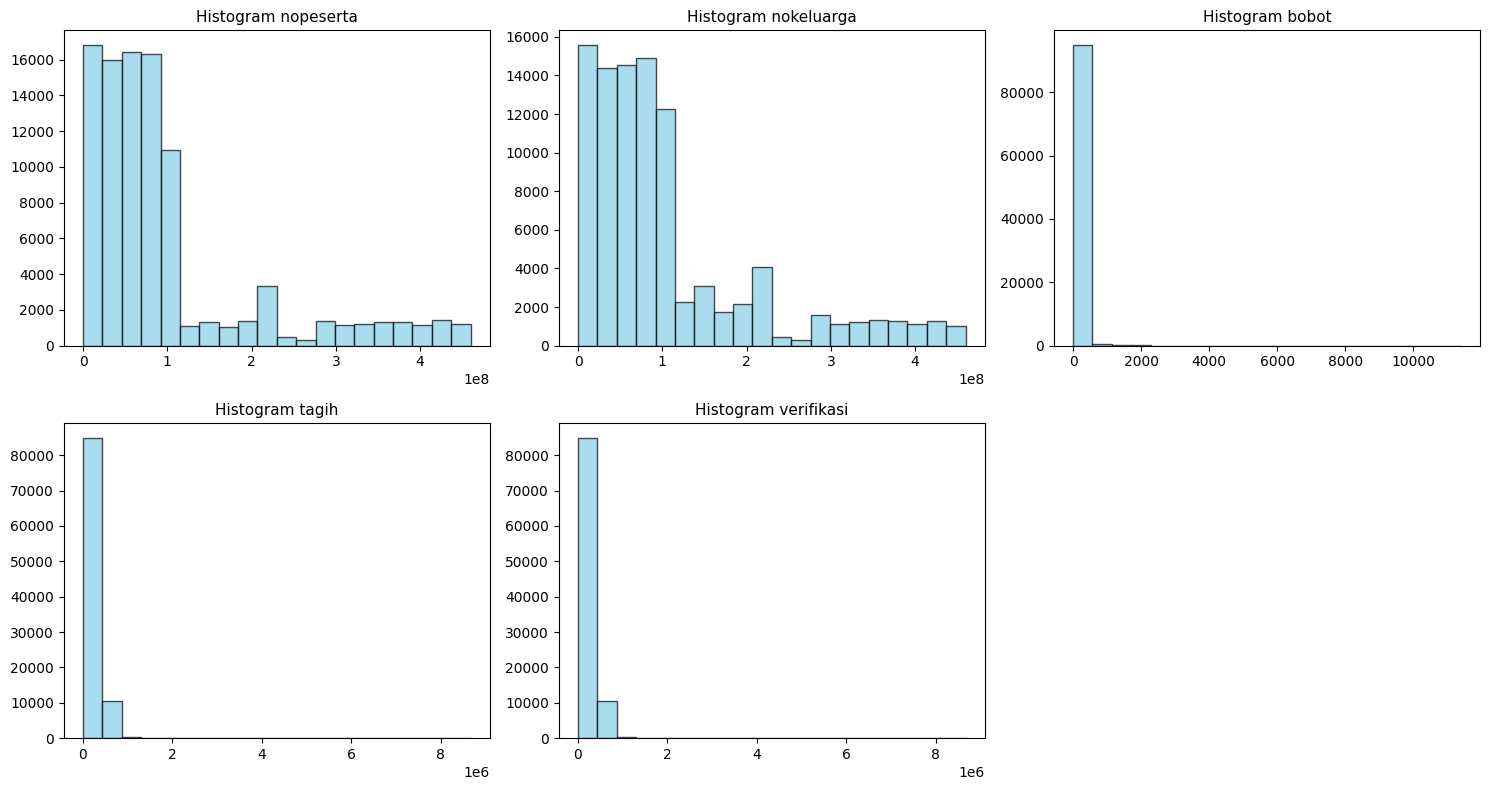

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'no']
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram {col}', fontsize=11)
plt.tight_layout()
plt.show()

Plot Boxplot untuk numerik (tidak semua)

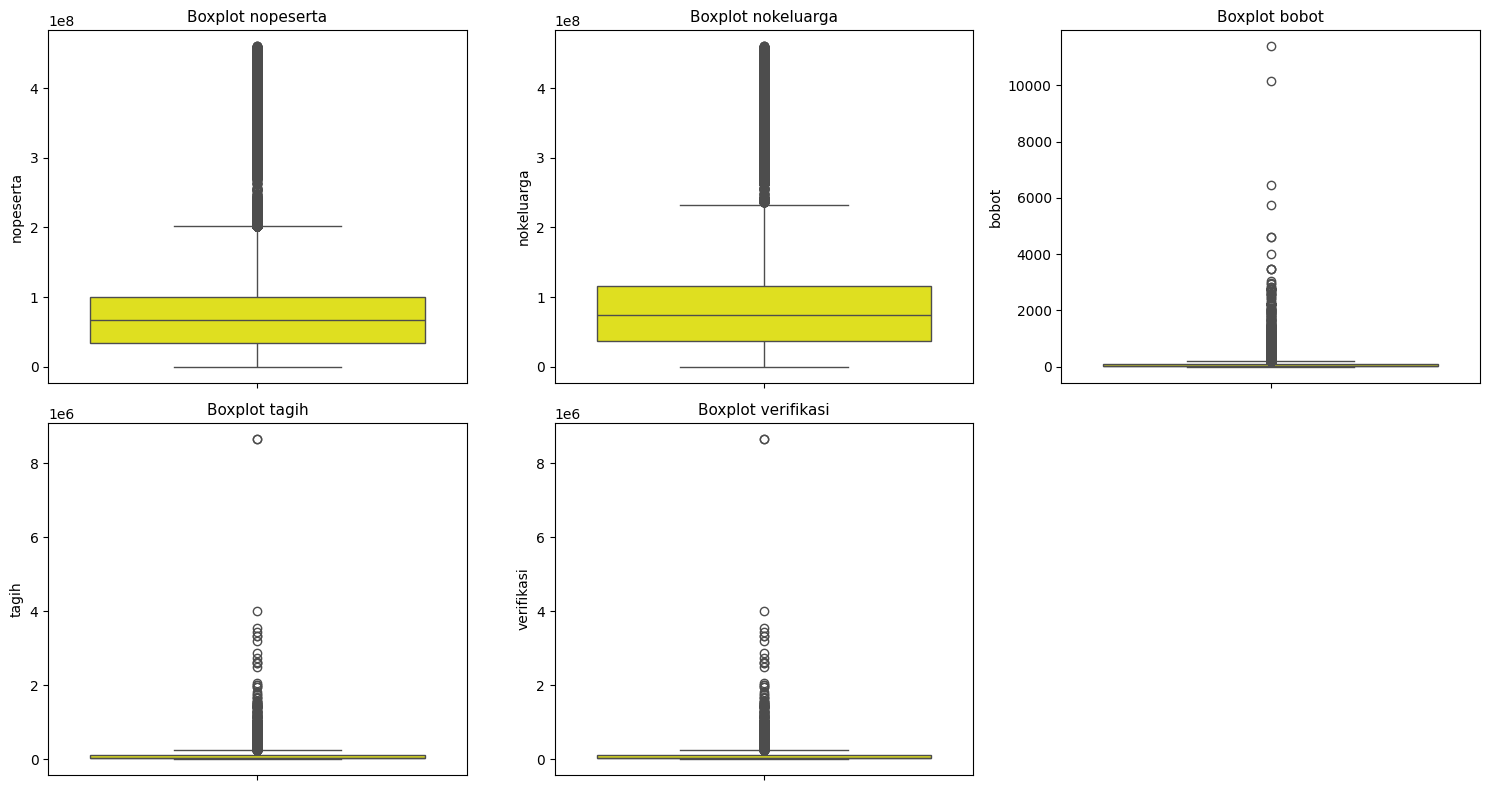

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'no']

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='yellow', linewidth=1)
    plt.title(f'Boxplot {col}', fontsize=11)
plt.tight_layout()
plt.show()

Plot barplot untuk kategorikal (tidak semua)

/tmp/ipython-input-4279885406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
/tmp/ipython-input-4279885406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
/tmp/ipython-input-4279885406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
/tmp/ipython-input-4279885406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

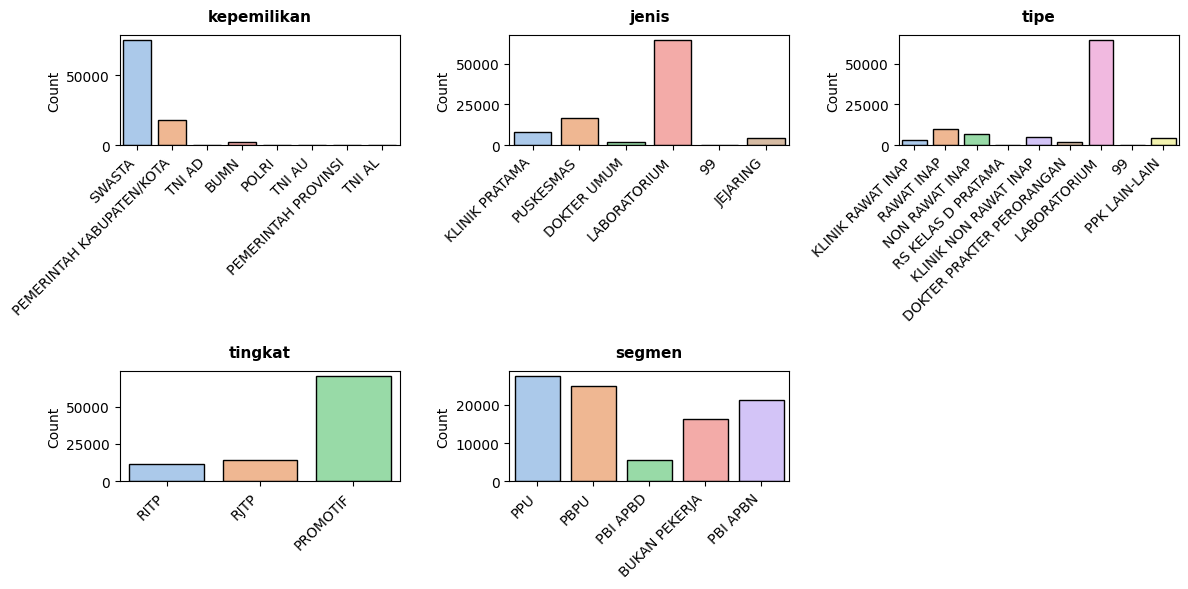

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if col not in [
    'idkunjungan', 'prov', 'tgglkunjungan', 'tggltindakan', 'tgglpulang',
    'kab_kota', 'kodenamaicd10', 'kodediagnosisicd10', 'kodediagnosis',
    'namadiagnosis', 'namatindakan'
]]

n_cols = 3
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(col, fontsize=11, fontweight='bold', pad=10)
    plt.xlabel("")       # hilangkan label bawah
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")

plt.tight_layout(h_pad=2.0, w_pad=1.5)
plt.show()

# Data Preprocessing

Membuat Variabel Target

Variabel target yang digunakan dalam penelitian ini adalah lama jeda tindakan dari waktu kunjungan pasien reguler. Variabel ini dihitung dari selisih antara tanggal kunjungan (PNK03) dan tanggal tindakan (PNK04) dalam satuan hari. Pemilihan variabel ini dipilih karena lama proses merupakan indikator efisiensi pelayanan rumah sakit

Konversi kolom tanggal ke datetime

In [ ]:
for col in ['tgglkunjungan', 'tggltindakan', 'tgglpulang']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

Hitung lama proses dalam hari

In [ ]:
if 'tggltindakan' in df.columns and 'tgglkunjungan' in df.columns:
    df['lamaproses'] = (df['tggltindakan'] - df['tgglkunjungan']).dt.days

Cek distribusi lama proses

In [ ]:
print(df['lamaproses'].describe())

count    95617.000000
mean         0.057333
std          0.427638
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: lamaproses, dtype: float64


Visualisasi distribusi lama proses

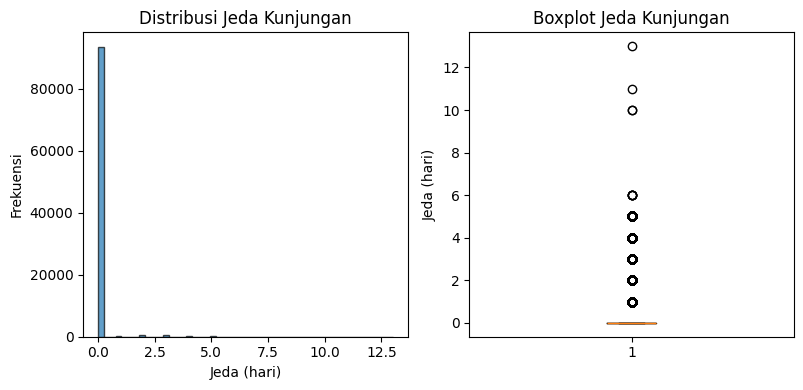

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['lamaproses'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Jeda (hari)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jeda Kunjungan')

plt.subplot(1, 3, 2)
plt.boxplot(df['lamaproses'].dropna())
plt.ylabel('Jeda (hari)')
plt.title('Boxplot Jeda Kunjungan')

plt.tight_layout()
plt.show()

# Data Cleaning

Data sudah hampir bersih tidak ada missing value, nilai negatif, lebih dari 365 hari, tapi tetap harus dicek

In [ ]:
print(f"Total data awal: {len(df):,}")

# Hapus data dengan durasi negatif atau NaN
df_clean = df[df['lamaproses'].notna()].copy()
df_clean = df_clean[df_clean['lamaproses'] >= 0].copy()

# Hapus outlier ekstrem (durasi > 365 hari = 1 tahun)
df_clean = df_clean[df_clean['lamaproses'] <= 365].copy()

print(f"Data setelah cleaning: {len(df_clean):,}")
print(f"Data dihapus: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")


Total data awal: 95,617
Data setelah cleaning: 95,617
Data dihapus: 0 (0.00%)


Menghapus kolom yang tidak relevan

In [ ]:
cols_to_drop = ['no','nopeserta','nokeluarga','idkunjungan']
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=cols_to_drop_existing)
df

,bobot,tgglkunjungan,tggltindakan,tgglpulang,prov,kab_kota,kepemilikan,jenis,tipe,tingkat,segmen,kodenamaicd10,kodediagnosisicd10,kodediagnosis,namadiagnosis,namatindakan,tagih,verifikasi,lamaproses
0,0.949749,2021-04-18,2021-04-20,2021-04-20,JAWA TIMUR,KAB. LAMONGAN,SWASTA,KLINIK PRATAMA,KLINIK RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A01,Typhoid and paratyphoid fevers,Rawat Inap di R. Perawatan Biasa,360000,360000,2
1,6.303136,2021-01-26,2021-01-29,2021-01-29,JAWA TIMUR,KAB. BANGKALAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,540000,540000,3
2,24.871052,2021-04-30,2021-05-02,2021-05-02,JAWA TIMUR,KAB. TRENGGALEK,SWASTA,KLINIK PRATAMA,KLINIK RAWAT INAP,RITP,PBPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,360000,360000,2
3,18.174042,2021-10-02,2021-10-04,2021-10-04,LAMPUNG,KAB. TANGGAMUS,SWASTA,KLINIK PRATAMA,KLINIK RAWAT INAP,RITP,PBI APBD,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,400000,400000,2
4,45.487633,2021-06-09,2021-06-13,2021-06-13,ACEH,KAB. ACEH UTARA,SWASTA,KLINIK PRATAMA,KLINIK RAWAT INAP,RITP,BUKAN PEKERJA,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,660000,660000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95612,13.705892,2021-06-11,2021-06-11,2021-06-11,SULAWESI TENGGARA,KAB. KOLAKA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RJTP,PBPU,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Suntik,15000,15000,0
95613,50.320034,2021-02-24,2021-02-24,2021-02-24,NUSA TENGGARA BARAT,KOTA BIMA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RJTP,PPU,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Pemasangan IUD / Implant,100000,100000,0
95614,250.536970,2021-09-22,2021-09-22,2021-09-22,SULAWESI SELATAN,KAB. SINJAI,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RJTP,PBI APBD,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Cabut IUD / Implant,100000,100000,0
95615,312.740600,2021-10-14,2021-10-14,2021-10-14,SULAWESI SELATAN,KAB. BANTAENG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RJTP,PBI APBN,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Cabut IUD / Implant,100000,100000,0


# Feature Engineering

Menghapus kolom yang tidak relevan (sudah dilakukan) dan membuat scatterplot dan heatmap untuk menemukan feature yang memiliki koefisien korelasi tertinggi

In [ ]:
feature_candidates = {'bobot', 'tgglkunjungan', 'tggltindakan', 'tgglpulang', 'prov', 'kab_kota', 'kepemilikan', 'jenis', 'tipe', 'tingkat', 'segmen', 'kodenamaicd10', 'kodediagnosis','namadiagnosis', 'namatindakan', 'tagih', 'verifikasi'}

In [ ]:
# Pilih kolom yang tersedia
available_features = [col for col in feature_candidates if col in df.columns]
print(f"Features tersedia: {len(available_features)} dari {len(feature_candidates)}")

# Buat dataframe untuk modeling
df_model = df[available_features + ['lamaproses']].copy()

# Drop date columns as they are not suitable for f_regression
date_cols_to_drop = ['tgglkunjungan', 'tggltindakan', 'tgglpulang']
available_features = [col for col in available_features if col not in date_cols_to_drop]
df_model = df_model.drop(columns=date_cols_to_drop, errors='ignore')

Features tersedia: 17 dari 17


Identifikasi tipe features

In [ ]:
numerical_features = []
categorical_features = []

for col in available_features:
    if df_model[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
        print(f"  • {col}: Numerikal")
    else:
        categorical_features.append(col)
        print(f"  • {col}: Kategorikal")

print(f"\nTotal Numerical Features: {len(numerical_features)}")
print(f"Total Categorical Features: {len(categorical_features)}")

  • kepemilikan: Kategorikal
  • verifikasi: Numerikal
  • tipe: Kategorikal
  • tagih: Numerikal
  • prov: Kategorikal
  • kab_kota: Kategorikal
  • segmen: Kategorikal
  • jenis: Kategorikal
  • namadiagnosis: Kategorikal
  • bobot: Numerikal
  • namatindakan: Kategorikal
  • kodediagnosis: Kategorikal
  • tingkat: Kategorikal
  • kodenamaicd10: Kategorikal

Total Numerical Features: 3
Total Categorical Features: 11


# Feature Selection

Digunakan metode ganda

*   METODE 1: Korelasi Pearson untuk Numerikal
*   METODE 2: Mutual Information untuk Kategorikal



In [ ]:
# Simpan data asli sebelum encoding untuk analisis
df_before_encoding = df_model.copy()

# Encoding categorical features
print("Encoding Categorical Features untuk Modeling")
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    print(f"  • {col}: {len(le.classes_)} unique values → encoded to [0-{len(le.classes_)-1}]")

Encoding Categorical Features untuk Modeling
  • kepemilikan: 8 unique values → encoded to [0-7]
  • tipe: 9 unique values → encoded to [0-8]
  • prov: 34 unique values → encoded to [0-33]
  • kab_kota: 480 unique values → encoded to [0-479]
  • segmen: 5 unique values → encoded to [0-4]
  • jenis: 6 unique values → encoded to [0-5]
  • namadiagnosis: 841 unique values → encoded to [0-840]
  • namatindakan: 33 unique values → encoded to [0-32]
  • kodediagnosis: 841 unique values → encoded to [0-840]
  • tingkat: 3 unique values → encoded to [0-2]
  • kodenamaicd10: 412 unique values → encoded to [0-411]


METODE 1: Korelasi Pearson untuk Numerikal

Menghitung korelasi untuk 3 prediktor numerikal
   Feature  Raw_Correlation    Score
verifikasi         0.265852 0.265852
     tagih         0.265852 0.265852
     bobot         0.013581 0.013581


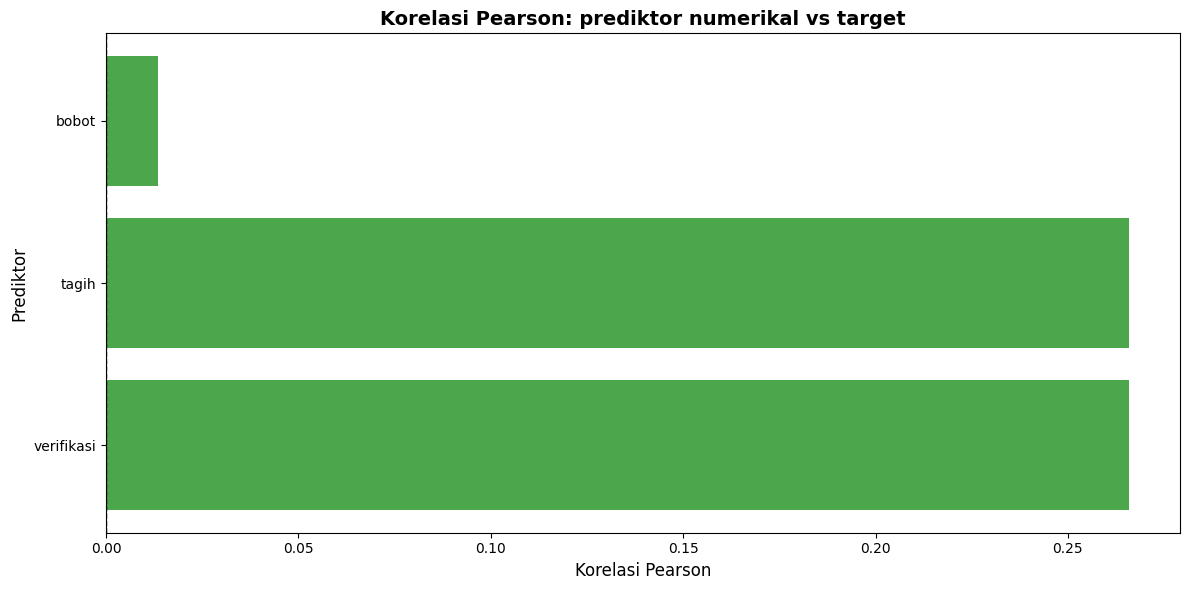

In [ ]:
numerical_scores = {}

if len(numerical_features) > 0:
    print(f"Menghitung korelasi untuk {len(numerical_features)} prediktor numerikal")

    for feat in numerical_features:
        # Hitung korelasi Pearson
        corr = df_model[feat].corr(df_model['lamaproses'])
        numerical_scores[feat] = {
            'correlation': abs(corr),  # absolute value
            'raw_correlation': corr,
            'method': 'Pearson Correlation'
        }

    # Buat dataframe hasil
    numerical_df = pd.DataFrame([
        {
            'Feature': feat,
            'Score': numerical_scores[feat]['correlation'],
            'Raw_Correlation': numerical_scores[feat]['raw_correlation'],
            'Method': 'Pearson',
        }
        for feat in numerical_features
    ]).sort_values('Score', ascending=False)

    print(numerical_df[['Feature', 'Raw_Correlation', 'Score']].to_string(index=False))

    # Visualisasi
    if len(numerical_features) > 0:
        plt.figure(figsize=(12, 6))
        colors = ['green' if x > 0 else 'red' for x in numerical_df['Raw_Correlation']]
        plt.barh(numerical_df['Feature'], numerical_df['Raw_Correlation'], color=colors, alpha=0.7)
        plt.xlabel('Korelasi Pearson', fontsize=12)
        plt.ylabel('Prediktor', fontsize=12)
        plt.title('Korelasi Pearson: prediktor numerikal vs target', fontsize=14, fontweight='bold')
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.tight_layout()
        plt.show()
else:
    print("\n⚠ Tidak ada prediktor numerikal untuk dianalisis")

METODE 2: Mutual Information untuk Kategorikal

Menghitung Mutual Information untuk 11 prediktor kategorikal
      Feature    Score  Unique_Values
 namatindakan 0.097422             33
kodediagnosis 0.074117            841
kodenamaicd10 0.072703            412
namadiagnosis 0.067949            841
      tingkat 0.048419              3
         tipe 0.043120              9
        jenis 0.027632              6
     kab_kota 0.023358            480
  kepemilikan 0.006088              8
         prov 0.002279             34
       segmen 0.000000              5


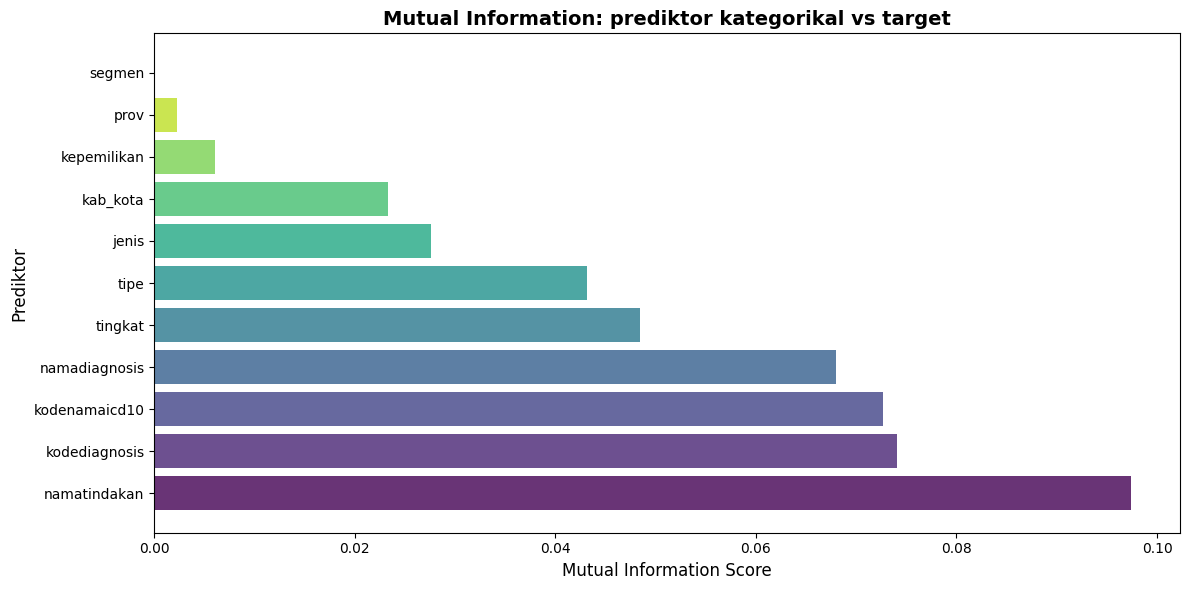

In [ ]:
categorical_scores = {}

if len(categorical_features) > 0:
    print(f"Menghitung Mutual Information untuk {len(categorical_features)} prediktor kategorikal")

    # Gunakan data yang sudah di-encode
    X_cat = df_model[categorical_features]
    y = df_model['lamaproses']

    # Hitung MI scores
    mi_scores = mutual_info_regression(X_cat, y, random_state=42, n_neighbors=5)

    # Simpan hasil
    for i, feat in enumerate(categorical_features):
        categorical_scores[feat] = {
            'mi_score': mi_scores[i],
            'method': 'Mutual Information'
        }

    # Buat dataframe hasil
    categorical_df = pd.DataFrame([
        {
            'Feature': feat,
            'Score': categorical_scores[feat]['mi_score'],
            'Method': 'Mutual Information',
            'Unique_Values': len(df_before_encoding[feat].unique()),
        }
        for feat in categorical_features
    ]).sort_values('Score', ascending=False)

    print(categorical_df[['Feature', 'Score', 'Unique_Values']].to_string(index=False))

    # Visualisasi
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(categorical_df)))
    plt.barh(categorical_df['Feature'], categorical_df['Score'], color=colors, alpha=0.8)
    plt.xlabel('Mutual Information Score', fontsize=12)
    plt.ylabel('Prediktor', fontsize=12)
    plt.title('Mutual Information: prediktor kategorikal vs target', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠ Tidak ada prediktor kategorikal untuk dianalisis")

Gabungkan dan lihat prediktor terbaik

Ranking Semua Prediktor Berdasarkan Score
      Feature    Score              Method        Type
   verifikasi 0.265852 Pearson Correlation   Numerical
        tagih 0.265852 Pearson Correlation   Numerical
 namatindakan 0.097422  Mutual Information Categorical
kodediagnosis 0.074117  Mutual Information Categorical
kodenamaicd10 0.072703  Mutual Information Categorical
namadiagnosis 0.067949  Mutual Information Categorical
      tingkat 0.048419  Mutual Information Categorical
         tipe 0.043120  Mutual Information Categorical
        jenis 0.027632  Mutual Information Categorical
     kab_kota 0.023358  Mutual Information Categorical
        bobot 0.013581 Pearson Correlation   Numerical
  kepemilikan 0.006088  Mutual Information Categorical
         prov 0.002279  Mutual Information Categorical
       segmen 0.000000  Mutual Information Categorical


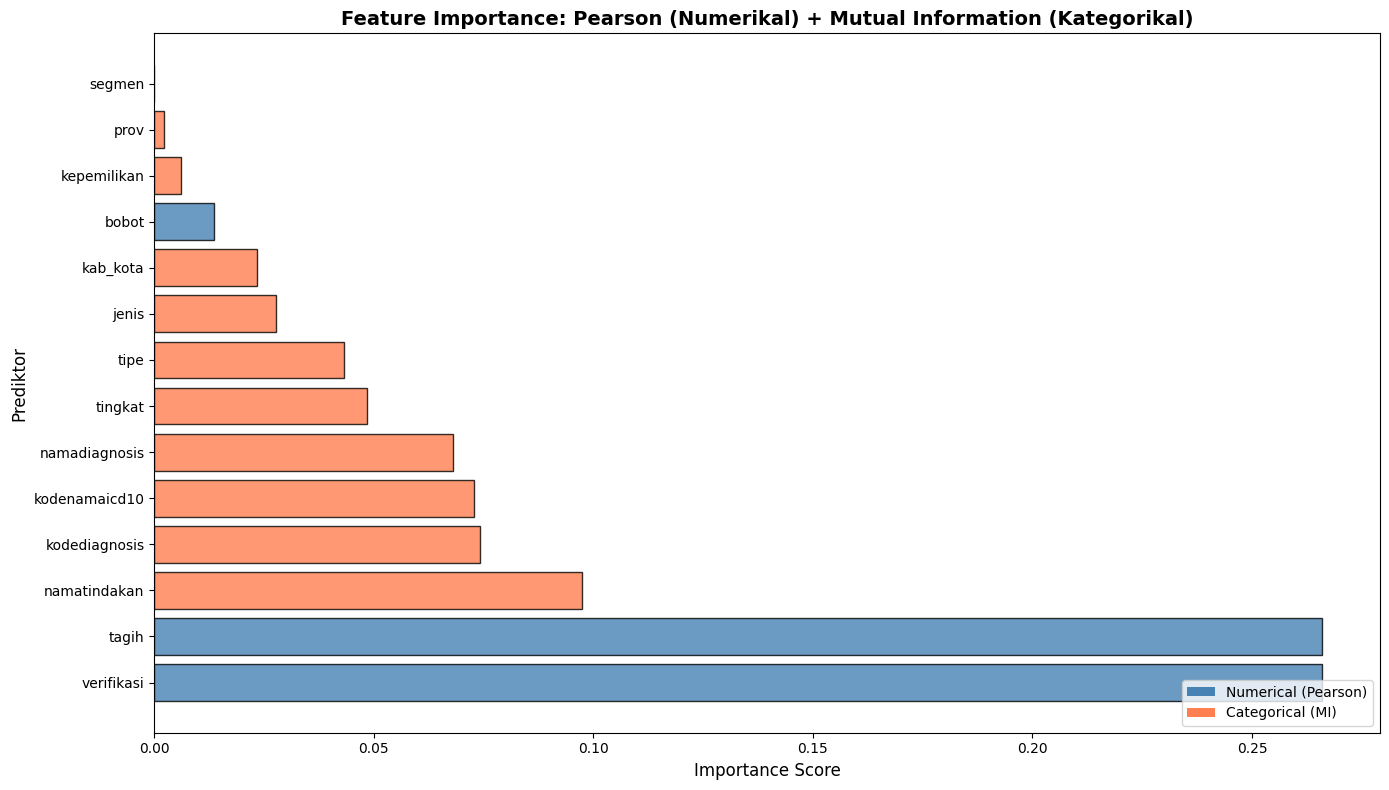

In [ ]:
all_features_scores = []

for feat in numerical_features:
    all_features_scores.append({
        'Feature': feat,
        'Score': numerical_scores[feat]['correlation'],
        'Method': 'Pearson Correlation',
        'Type': 'Numerical',
    })

for feat in categorical_features:
    all_features_scores.append({
        'Feature': feat,
        'Score': categorical_scores[feat]['mi_score'],
        'Method': 'Mutual Information',
        'Type': 'Categorical',
    })

# Buat dataframe gabungan
all_features_df = pd.DataFrame(all_features_scores).sort_values('Score', ascending=False)

print("Ranking Semua Prediktor Berdasarkan Score")
print(all_features_df[['Feature', 'Score', 'Method', 'Type']].to_string(index=False))

# Visualisasi gabungan
plt.figure(figsize=(14, 8))
colors_map = {'Numerical': 'steelblue', 'Categorical': 'coral'}
colors = [colors_map[t] for t in all_features_df['Type']]

plt.barh(all_features_df['Feature'], all_features_df['Score'], color=colors, alpha=0.8, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Prediktor', fontsize=12)
plt.title('Feature Importance: Pearson (Numerikal) + Mutual Information (Kategorikal)',
          fontsize=14, fontweight='bold')
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', label='Numerical (Pearson)'),
    Patch(facecolor='coral', label='Categorical (MI)')
]
plt.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()

Prediktor terbaik

In [ ]:
n_top_features = min(5, len(available_features))
top_features = all_features_df.head(n_top_features)['Feature'].tolist()

print(f"Dipilih {n_top_features} prediktor terbaik")
for i, feat in enumerate(top_features, 1):
    row = all_features_df[all_features_df['Feature'] == feat].iloc[0]
    # Removed the line that accesses the 'Description' column
    print(f"  {i}. {feat:10s} - Score: {row['Score']:.4f} ({row['Method']})")

Dipilih 5 prediktor terbaik
  1. verifikasi - Score: 0.2659 (Pearson Correlation)
  2. tagih      - Score: 0.2659 (Pearson Correlation)
  3. namatindakan - Score: 0.0974 (Mutual Information)
  4. kodediagnosis - Score: 0.0741 (Mutual Information)
  5. kodenamaicd10 - Score: 0.0727 (Mutual Information)


# Training dan Evaluasi

Training dengan Split Train Test 80:20

In [ ]:
X = df_model[available_features]
y = df_model['lamaproses']

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Data Training: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Data Testing : {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

Data Training: 76,493 samples (80.0%)
Data Testing : 19,124 samples (20.0%)


Eksperimen Kombinasi Prediktor

In [ ]:
kombinasi_prediktor = []

# Model 1: Top 1 Feature
kombinasi_prediktor.append({
    'model_name': 'Model 1 (1 Prediktor)',
    'features': top_features[:1],
    'description': f"Prediktor: {top_features[0]}"
})

# Model 2: Top 2 Features
kombinasi_prediktor.append({
    'model_name': 'Model 2 (2 Prediktor)',
    'features': top_features[:2],
    'description': f"Prediktor: {', '.join(top_features[:2])}"
})

# Model 3: Top 3 Features
kombinasi_prediktor.append({
    'model_name': 'Model 3 (3 Prediktor)',
    'features': top_features[:3],
    'description': f"Prediktor: {', '.join(top_features[:3])}"
})

# Model 4: Top 4 Features
kombinasi_prediktor.append({
    'model_name': 'Model 4 (4 Prediktor)',
    'features': top_features[:4],
    'description': f"Prediktor: {', '.join(top_features[:4])}"
})

# Model 5: ALL 5 Features
kombinasi_prediktor.append({
    'model_name': 'Model 5 (5 Prediktor - FULL)',
    'features': top_features[:5],
    'description': f"Prediktor: {', '.join(top_features[:5])}"
})

# Training dan evaluasi setiap kombinasi
hasil_eksperimen = []

for i, combo in enumerate(kombinasi_prediktor, 1):
    print(f"\n{'='*70}")
    print(f"{combo['model_name']}")
    print(f"{'='*70}")
    print(f"Kombinasi Atribut Prediktor:")
    for j, feat in enumerate(combo['features'], 1):
        # Access information from all_features_df
        feat_info = all_features_df[all_features_df['Feature'] == feat].iloc[0]
        print(f"  {j}. {feat} - Score: {feat_info['Score']:.4f} ({feat_info['Method']}, {feat_info['Type']})")


    # Prepare data
    X_train_combo = X_train[combo['features']]
    X_test_combo = X_test[combo['features']]

    # Train model
    model = LinearRegression()

    start_time = time.time()
    model.fit(X_train_combo_scaled, y_train)
    waktu_eksekusi = time.time() - start_time

    # Predict
    y_train_pred = model.predict(X_train_combo_scaled)
    y_test_pred = model.predict(X_test_combo_scaled)

    # Evaluate
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # MAPE
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f"\nHasil Evaluasi:")
    print(f"  Akurasi (R²)       : {test_r2:.4f} ({test_r2*100:.2f}%)")
    print(f"  MAE                : {test_mae:.4f} hari")
    print(f"  RMSE               : {test_rmse:.4f} hari")
    print(f"  MAPE               : {test_mape:.2f}%")
    print(f"  Waktu Eksekusi     : {waktu_eksekusi:.4f} detik")

    # Simpan hasil
    hasil_eksperimen.append({
        'Model': combo['model_name'],
        'Num_Features': len(combo['features']),
        'Features': ', '.join(combo['features']),
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Test_MAPE': test_mape,
        'Waktu_Eksekusi': waktu_eksekusi,
        'Model_Object': model,
        'Scaler': scaler_combo
    })


Model 1 (1 Prediktor)
Kombinasi Atribut Prediktor:
  1. verifikasi - Score: 0.2659 (Pearson Correlation, Numerical)

Hasil Evaluasi:
  Akurasi (R²)       : 0.1974 (19.74%)
  MAE                : 0.1612 hari
  RMSE               : 0.3757 hari
  MAPE               : inf%
  Waktu Eksekusi     : 0.0559 detik

Model 2 (2 Prediktor)
Kombinasi Atribut Prediktor:
  1. verifikasi - Score: 0.2659 (Pearson Correlation, Numerical)
  2. tagih - Score: 0.2659 (Pearson Correlation, Numerical)

Hasil Evaluasi:
  Akurasi (R²)       : 0.1974 (19.74%)
  MAE                : 0.1612 hari
  RMSE               : 0.3757 hari
  MAPE               : inf%
  Waktu Eksekusi     : 0.0358 detik

Model 3 (3 Prediktor)
Kombinasi Atribut Prediktor:
  1. verifikasi - Score: 0.2659 (Pearson Correlation, Numerical)
  2. tagih - Score: 0.2659 (Pearson Correlation, Numerical)
  3. namatindakan - Score: 0.0974 (Mutual Information, Categorical)

Hasil Evaluasi:
  Akurasi (R²)       : 0.1974 (19.74%)
  MAE                : 0.

Perbandingan Hasil Eksperimen

Tabel Perbandingan Model
                       Model  Num_Features  Test_MAE  Test_RMSE  Test_R2  Test_MAPE  Waktu_Eksekusi
       Model 1 (1 Prediktor)             1  0.103914   0.405878 0.063275        inf        0.005597
       Model 2 (2 Prediktor)             2  0.103914   0.405878 0.063275        inf        0.003992
       Model 3 (3 Prediktor)             3  0.151154   0.392822 0.122571        inf        0.005116
       Model 4 (4 Prediktor)             4  0.152687   0.382361 0.168679        inf        0.006620
Model 5 (5 Prediktor - FULL)             5  0.161155   0.375697 0.197403        inf        0.007988


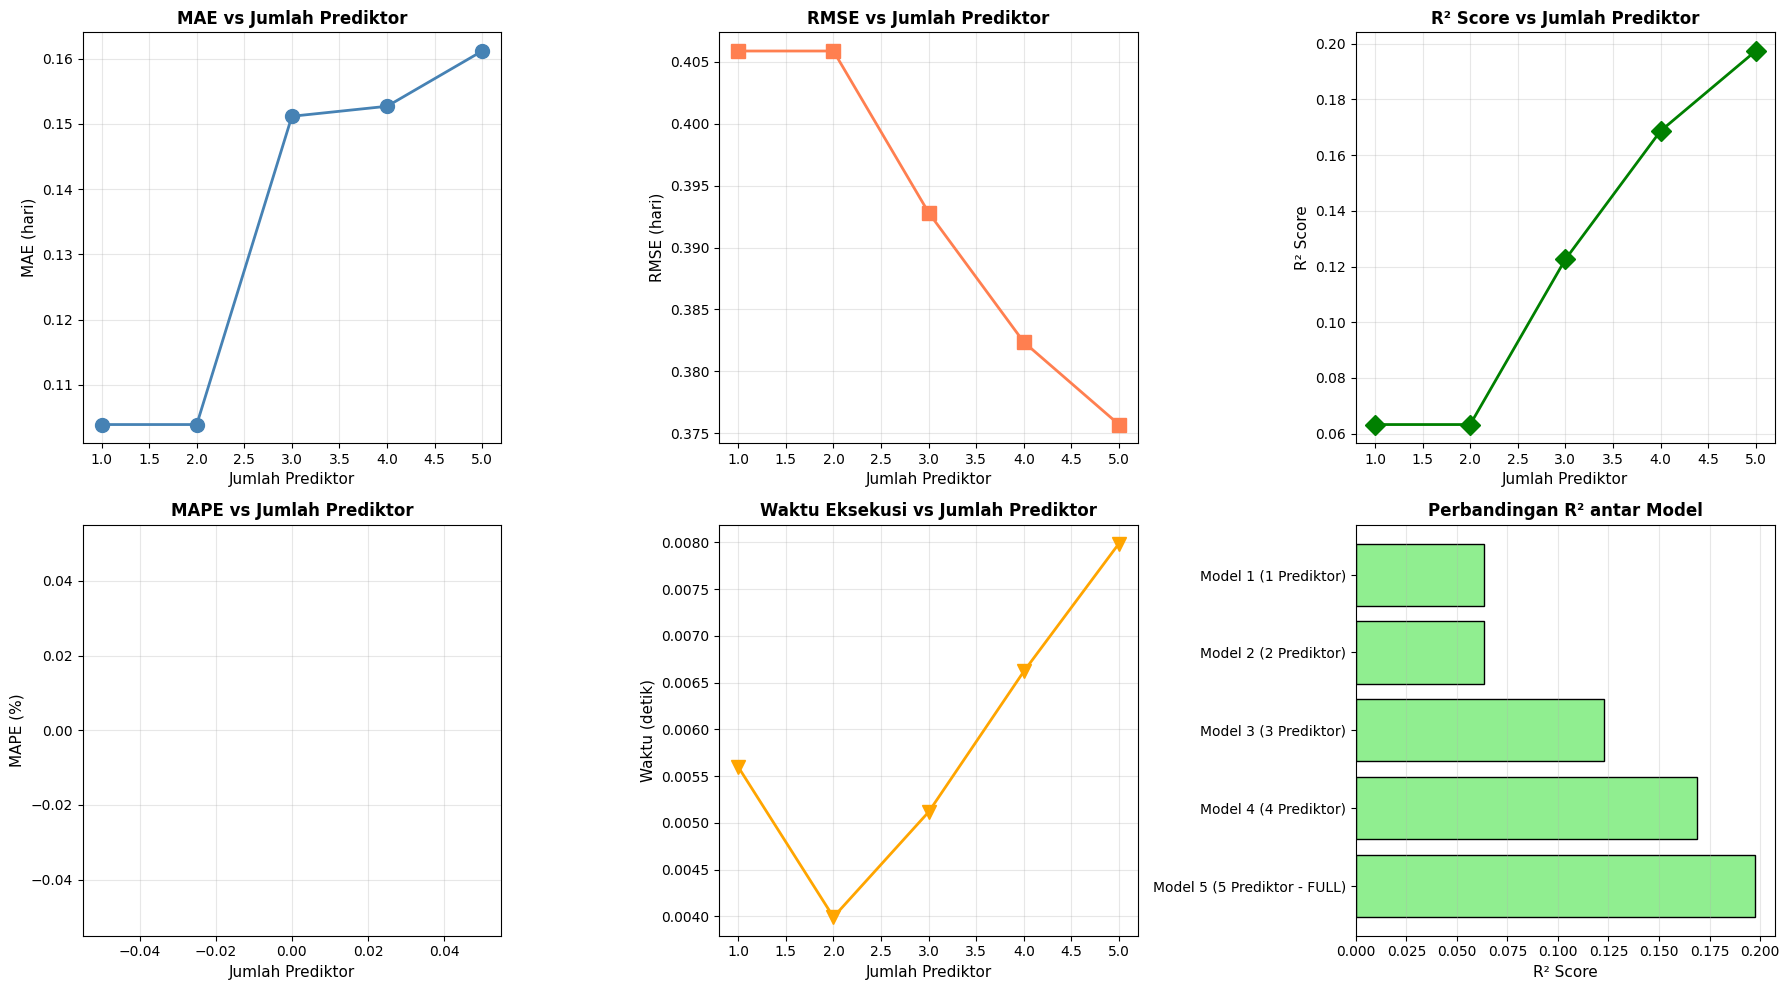


MODEL DITRAINING PADA DATASET LENGKAP (SEMUA FITUR) (0.0468 detik)
Model: Linear Regression (Trained on all features)
Jumlah Prediktor: 14
Features: kepemilikan, verifikasi, tipe, tagih, prov, kab_kota, segmen, jenis, namadiagnosis, bobot, namatindakan, kodediagnosis, tingkat, kodenamaicd10

Hasil Evaluasi Model Terbaik (dari eksperimen sebelumnya - pada Test Set):
  Test MAE           : 0.1039 hari
  Test RMSE          : 0.4059 hari
  Test R²            : 0.0633
  Test MAPE          : inf%


/tmp/ipython-input-160051676.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_model_info['Model_Object'] = final_model
/tmp/ipython-input-160051676.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_model_info['Scaler'] = scaler # Use the scaler fitted on all features


In [ ]:
hasil_df = pd.DataFrame(hasil_eksperimen)

print("Tabel Perbandingan Model")
print(hasil_df[['Model', 'Num_Features', 'Test_MAE', 'Test_RMSE', 'Test_R2', 'Test_MAPE', 'Waktu_Eksekusi']].to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# MAE
axes[0, 0].plot(hasil_df['Num_Features'], hasil_df['Test_MAE'], marker='o', linewidth=2, markersize=10, color='steelblue')
axes[0, 0].set_xlabel('Jumlah Prediktor', fontsize=11)
axes[0, 0].set_ylabel('MAE (hari)', fontsize=11)
axes[0, 0].set_title('MAE vs Jumlah Prediktor', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# RMSE
axes[0, 1].plot(hasil_df['Num_Features'], hasil_df['Test_RMSE'], marker='s', linewidth=2, markersize=10, color='coral')
axes[0, 1].set_xlabel('Jumlah Prediktor', fontsize=11)
axes[0, 1].set_ylabel('RMSE (hari)', fontsize=11)
axes[0, 1].set_title('RMSE vs Jumlah Prediktor', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# R²
axes[0, 2].plot(hasil_df['Num_Features'], hasil_df['Test_R2'], marker='D', linewidth=2, markersize=10, color='green')
axes[0, 2].set_xlabel('Jumlah Prediktor', fontsize=11)
axes[0, 2].set_ylabel('R² Score', fontsize=11)
axes[0, 2].set_title('R² Score vs Jumlah Prediktor', fontsize=12, fontweight='bold')
axes[0, 2].grid(alpha=0.3)

# MAPE
axes[1, 0].plot(hasil_df['Num_Features'], hasil_df['Test_MAPE'], marker='^', linewidth=2, markersize=10, color='purple')
axes[1, 0].set_xlabel('Jumlah Prediktor', fontsize=11)
axes[1, 0].set_ylabel('MAPE (%)', fontsize=11)
axes[1, 0].set_title('MAPE vs Jumlah Prediktor', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Waktu Eksekusi
axes[1, 1].plot(hasil_df['Num_Features'], hasil_df['Waktu_Eksekusi'], marker='v', linewidth=2, markersize=10, color='orange')
axes[1, 1].set_xlabel('Jumlah Prediktor', fontsize=11)
axes[1, 1].set_ylabel('Waktu (detik)', fontsize=11)
axes[1, 1].set_title('Waktu Eksekusi vs Jumlah Prediktor', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Bar chart perbandingan R²
axes[1, 2].barh(hasil_df['Model'], hasil_df['Test_R2'], color='lightgreen', edgecolor='black')
axes[1, 2].set_xlabel('R² Score', fontsize=11)
axes[1, 2].set_title('Perbandingan R² antar Model', fontsize=12, fontweight='bold')
axes[1, 2].invert_yaxis()
axes[1, 2].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Model terbaik
best_model_idx = hasil_df['Test_MAE'].idxmin()
best_model_info = hasil_df.loc[best_model_idx]

# Train the best model (Linear Regression in this case) on the entire dataset using ALL features
# This assumes the user wants to use a model trained on all features for the final prediction step
final_model = LinearRegression()

# Use the scaler fitted on the full training dataset (which has all 14 features)
# Assuming 'scaler' variable from cell 4KDB-lz-iaqB is available and fitted on X_train
X_full_scaled = scaler.transform(X) # Scale the entire X dataset using the scaler from training

start_time = time.time()
final_model.fit(X_full_scaled, y) # Train on the scaled full dataset with all features
final_train_time_full_data = time.time() - start_time

print(f"\n{'='*70}")
print(f"MODEL DITRAINING PADA DATASET LENGKAP (SEMUA FITUR) ({final_train_time_full_data:.4f} detik)")
print(f"{'='*70}")
print(f"Model: Linear Regression (Trained on all features)") # Update model name for clarity
print(f"Jumlah Prediktor: {X_full_scaled.shape[1]}")
print(f"Features: {', '.join(X.columns)}") # List all columns in X

# Update best_model_info with the final trained model and the scaler used for all features
best_model_info['Model_Object'] = final_model
best_model_info['Scaler'] = scaler # Use the scaler fitted on all features

# Print the evaluation metrics of the best model from the previous experiment (on test set)
print("\nHasil Evaluasi Model Terbaik (dari eksperimen sebelumnya - pada Test Set):")
print(f"  Test MAE           : {best_model_info['Test_MAE']:.4f} hari")
print(f"  Test RMSE          : {best_model_info['Test_RMSE']:.4f} hari")
print(f"  Test R²            : {best_model_info['Test_R2']:.4f}")
print(f"  Test MAPE          : {best_model_info['Test_MAPE']:.2f}%")

# Training Model Terbaik dan Evaluasi Dataset

Training model terbaik dengan full training data

In [ ]:
start_time = time.time()
best_model_info['Model_Object'].fit(X_train_scaled, y_train)
final_train_time = time.time() - start_time

print(f"Model berhasil di-training ({final_train_time:.4f} detik)")

Model berhasil di-training (0.1826 detik)


Matriks evaluasi model

In [ ]:
# Prediksi
y_train_pred = best_model_info['Model_Object'].predict(X_train_scaled)
y_test_pred = best_model_info['Model_Object'].predict(X_test_scaled)

# Evaluasi Train Set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi Test Set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("MATRIKS EVALUASI MODEL")

# Hitung metrik tambahan
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# MAPE (Mean Absolute Percentage Error)
# Handle zero values in y_train and y_test to avoid division by zero
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train.replace(0, np.nan))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test.replace(0, np.nan))) * 100

# Max Error
train_max_error = np.max(np.abs(y_train - y_train_pred))
test_max_error = np.max(np.abs(y_test - y_test_pred))

# Adjusted R²
n_train = len(y_train)
n_test = len(y_test)
# Ensure p is the number of features in the scaled data
p = X_train_scaled.shape[1]

train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# Tampilkan matriks evaluasi
evaluation_matrix = pd.DataFrame({
    'Metric': [
        'Mean Absolute Error (MAE)',
        'Mean Squared Error (MSE)',
        'Root Mean Squared Error (RMSE)',
        'R² Score',
        'Adjusted R² Score',
        'Mean Absolute Percentage Error (MAPE)',
        'Max Error'
    ],
    'Training': [
        f'{train_mae:.4f} hari',
        f'{train_mse:.4f}',
        f'{train_rmse:.4f} hari',
        f'{train_r2:.4f}',
        f'{train_adj_r2:.4f}',
        f'{train_mape:.2f}%',
        f'{train_max_error:.4f} hari'
    ],
    'Testing': [
        f'{test_mae:.4f} hari',
        f'{test_mse:.4f}',
        f'{test_rmse:.4f} hari',
        f'{test_r2:.4f}',
        f'{test_adj_r2:.4f}',
        f'{test_mape:.2f}%',
        f'{test_max_error:.4f} hari'
    ],
    'Interpretation': [
        'Rata-rata error absolut',
        'Rata-rata kuadrat error',
        'Standar deviasi error',
        'Proporsi variance explained',
        'R² adjusted untuk features',
        'Rata-rata % error',
        'Error maksimum'
    ]
})

print(evaluation_matrix.to_string(index=False))

MATRIKS EVALUASI MODEL
                               Metric     Training      Testing              Interpretation
            Mean Absolute Error (MAE)  0.1564 hari  0.1554 hari     Rata-rata error absolut
             Mean Squared Error (MSE)       0.1302       0.1301     Rata-rata kuadrat error
       Root Mean Squared Error (RMSE)  0.3608 hari  0.3607 hari       Standar deviasi error
                             R² Score       0.2950       0.2602 Proporsi variance explained
                    Adjusted R² Score       0.2949       0.2597  R² adjusted untuk features
Mean Absolute Percentage Error (MAPE)       64.32%       64.19%           Rata-rata % error
                            Max Error 11.7511 hari 10.2778 hari              Error maksimum


# Pemanfaatan Model untuk Memprediksi Data Baru

Simpan model

In [ ]:
model_filename = 'best_model_lamaproses.pkl'
scaler_filename = 'scaler_lamaproses.pkl'
feature_info_filename = 'feature_info.pkl'

# Save the trained model object
joblib.dump(best_model_info['Model_Object'], model_filename)

# Save the scaler fitted on the full data
joblib.dump(best_model_info['Scaler'], scaler_filename)

# Simpan feature info
feature_info = {
    'features': best_model_info['Features'].split(', '), # Get the list of features
    'label_encoders': label_encoders, # Assuming label_encoders is still relevant
    'model_name': best_model_info['Model'], # Use the model name from best_model_info
    'feature_scores': all_features_df.to_dict('records') # Keep the feature scores
}
joblib.dump(feature_info, feature_info_filename)

print(f"Model disimpan sebagai: {model_filename}")
print(f"Scaler disimpan sebagai: {scaler_filename}")
print(f"Feature info disimpan sebagai: {feature_info_filename}")

Model disimpan sebagai: best_model_lamaproses.pkl
Scaler disimpan sebagai: scaler_lamaproses.pkl
Feature info disimpan sebagai: feature_info.pkl


Prediksi dengan data baru

In [ ]:
print("\n[MODE: PREDIKSI DATA BARU — TANPA TARGET]")

# Contoh data baru (isi sesuai fitur X)
# Make sure column names and order match X.columns
data_baru = pd.DataFrame({
    'kepemilikan': [4, 1, 4], # Example values (need actual encoded values or handle encoding)
    'verifikasi': [30000, 50000, 120000], # Example values
    'tipe': [4, 4, 4], # Example values (need actual encoded values)
    'tagih': [30000, 50000, 120000], # Example values
    'prov': [10, 10, 9], # Example values (need actual encoded values)
    'kab_kota': [68, 33, 332], # Example values (need actual encoded values)
    'segmen': [2, 3, 4], # Example values (need actual encoded values)
    'jenis': [4, 4, 4], # Example values (need actual encoded values)
    'namadiagnosis': [224, 468, 224], # Example values (need actual encoded values)
    'bobot': [22.58, 30.23, 1.99], # Example values
    'namatindakan': [8, 7, 9], # Example values (need actual encoded values)
    'kodediagnosis': [195, 127, 195], # Example values (need actual encoded values)
    'tingkat': [0, 0, 0], # Example values (need actual encoded values)
    'kodenamaicd10': [107, 70, 107], # Example values (need actual encoded values)
}, columns=X.columns) # Use the columns from the training data X

print(f"\n✓ Jumlah data baru: {len(data_baru)}")
print(f"✓ Kolom prediktor: {list(data_baru.columns)}")

# Scaling sesuai model
# Use the scaler fitted on the full training data (from best_model_info)
data_baru_scaled = best_model_info['Scaler'].transform(data_baru)

# Prediksi
# Use the trained model object from best_model_info
prediksi_durasi = best_model_info['Model_Object'].predict(data_baru_scaled)

# Tampilkan hasil
hasil_prediksi = pd.DataFrame({
    'Sample': range(1, len(data_baru) + 1),
    'Durasi_Prediksi (hari)': prediksi_durasi
})
print("\n[Hasil Prediksi]")
print(hasil_prediksi.to_string(index=False))


[MODE: PREDIKSI DATA BARU — TANPA TARGET]

✓ Jumlah data baru: 3
✓ Kolom prediktor: ['kepemilikan', 'verifikasi', 'tipe', 'tagih', 'prov', 'kab_kota', 'segmen', 'jenis', 'namadiagnosis', 'bobot', 'namatindakan', 'kodediagnosis', 'tingkat', 'kodenamaicd10']

[Hasil Prediksi]
 Sample  Durasi_Prediksi (hari)
      1                0.007138
      2                0.054021
      3                0.093120



[Membuat Sample Data Baru untuk Testing]

✓ Jumlah data validasi: 5
✓ Features yang digunakan: ['kepemilikan', 'verifikasi', 'tipe', 'tagih', 'prov', 'kab_kota', 'segmen', 'jenis', 'namadiagnosis', 'bobot', 'namatindakan', 'kodediagnosis', 'tingkat', 'kodenamaicd10']

[Sample Data Baru (Features)]
       kepemilikan  verifikasi  tipe   tagih  prov  kab_kota  segmen  jenis  \
58034            4       30000     4   30000    10        68       2      4   
19732            4       50000     4   50000    10        33       3      4   
64470            4      120000     4  120000     9       332       4      4   
43853            4       50000     4   50000     8       392       4      4   
37450            4      160000     4  160000    14       389       1      4   

       namadiagnosis       bobot  namatindakan  kodediagnosis  tingkat  \
58034            224   22.586237             8            195        0   
19732            468   30.236958             7            127        0   
644

/tmp/ipython-input-2683918709.py:22: RuntimeWarning: divide by zero encountered in divide
  error_percent = np.abs((actual_duration.values - predictions) / actual_duration.values) * 100
/tmp/ipython-input-2683918709.py:37: RuntimeWarning: Mean of empty slice
  mape_validasi = np.nanmean(prediction_results['Error_Persen (%)'])
/tmp/ipython-input-2683918709.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


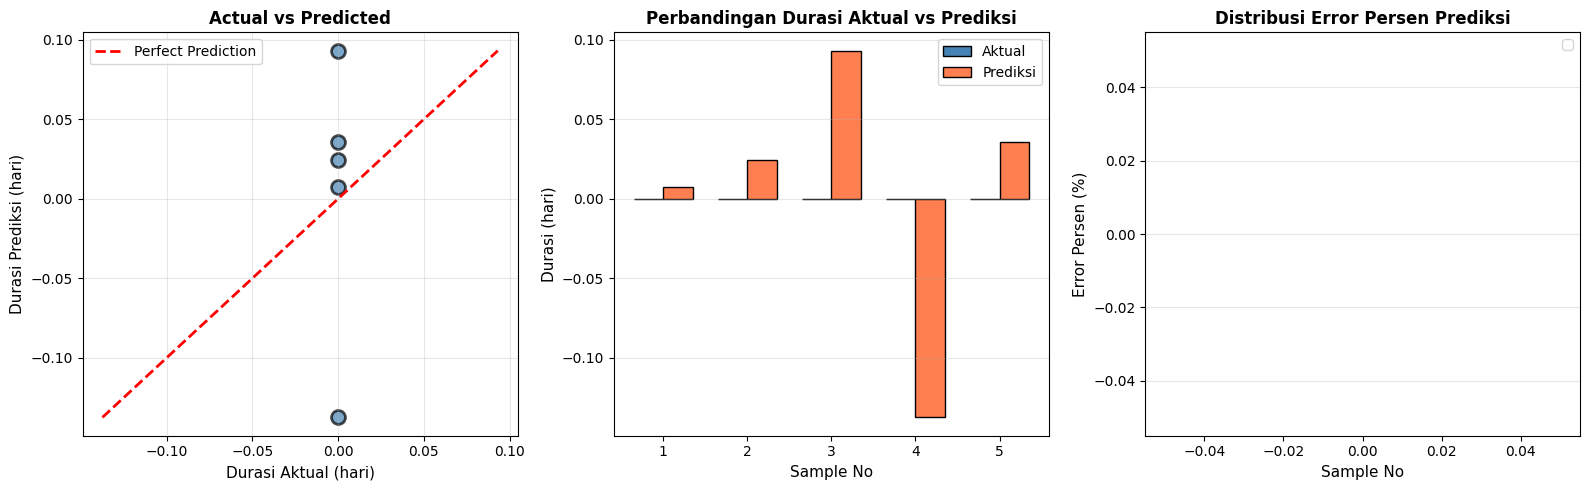

In [ ]:
print("\n[Membuat Sample Data Baru untuk Testing]")
np.random.seed(42) # Set seed for reproducibility
sample_indices = np.random.choice(X_test.index, 5, replace=False)
new_data = X_test.loc[sample_indices].copy()
actual_duration = y_test.loc[sample_indices]

print(f"\n✓ Jumlah data validasi: {len(new_data)}")
print(f"✓ Features yang digunakan: {list(new_data.columns)}") # List all columns used

print("\n[Sample Data Baru (Features)]")
print(new_data)

# Prediksi
# Use the scaler and model from best_model_info
# Ensure the feature names and order match the training data
new_data_scaled = best_model_info['Scaler'].transform(new_data[X.columns]) # Explicitly select columns using X.columns
predictions = best_model_info['Model_Object'].predict(new_data_scaled)

# Tampilkan hasil
print("\n[Hasil Prediksi vs Aktual]")
# Handle potential division by zero for MAPE calculation
error_percent = np.abs((actual_duration.values - predictions) / actual_duration.values) * 100
error_percent[actual_duration.values == 0] = np.nan  # Replace inf with NaN for actual duration = 0

prediction_results = pd.DataFrame({
    'Sample': range(1, len(new_data) + 1),
    'Durasi_Aktual (hari)': actual_duration.values,
    'Durasi_Prediksi (hari)': predictions,
    'Selisih (hari)': actual_duration.values - predictions,
    'Error_Persen (%)': error_percent
})
print(prediction_results.to_string(index=False, na_rep='N/A')) # Use na_rep for NaN values

# Statistik validasi
mae_validasi = mean_absolute_error(actual_duration, predictions)
# Calculate MAPE excluding NaN values
mape_validasi = np.nanmean(prediction_results['Error_Persen (%)'])

print(f"\n[Statistik Prediksi Sample]")
print(f"  MAE  : {mae_validasi:.4f} hari")
print(f"  MAPE : {mape_validasi:.2f}%")

# Visualisasi validasi (updated to handle potential NaN in Error_Persen for plotting)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Actual vs Predicted
axes[0].scatter(prediction_results['Durasi_Aktual (hari)'], prediction_results['Durasi_Prediksi (hari)'],
                s=100, alpha=0.7, edgecolors='black', linewidth=2, color='steelblue')
# Ensure the line goes through the range of actual durations
min_val = min(prediction_results['Durasi_Aktual (hari)'].min(), prediction_results['Durasi_Prediksi (hari)'].min())
max_val = max(prediction_results['Durasi_Aktual (hari)'].max(), prediction_results['Durasi_Prediksi (hari)'].max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Durasi Aktual (hari)', fontsize=11)
axes[0].set_ylabel('Durasi Prediksi (hari)', fontsize=11)
axes[0].set_title(f'Actual vs Predicted', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)


# Bar comparison
x_pos = np.arange(len(prediction_results))
width = 0.35
axes[1].bar(x_pos - width/2, prediction_results['Durasi_Aktual (hari)'], width, label='Aktual',
            color='steelblue', edgecolor='black')
axes[1].bar(x_pos + width/2, prediction_results['Durasi_Prediksi (hari)'], width, label='Prediksi',
            color='coral', edgecolor='black')
axes[1].set_xlabel('Sample No', fontsize=11)
axes[1].set_ylabel('Durasi (hari)', fontsize=11)
axes[1].set_title('Perbandingan Durasi Aktual vs Prediksi', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(prediction_results['Sample'])
axes[1].legend()
axes[1].grid(alpha=0.3, axis='y')

# Error distribution (handle NaN values for plotting)
# Filter out NaN values from Error_Persen before plotting
valid_errors = prediction_results.dropna(subset=['Error_Persen (%)'])
axes[2].bar(valid_errors['Sample'], valid_errors['Error_Persen (%)'], color='crimson',
            edgecolor='black', alpha=0.7)
# Plot mean MAPE if there are valid MAPE values
if not np.isnan(mape_validasi):
    axes[2].axhline(y=mape_validasi, color='blue', linestyle='--', linewidth=2,
                    label=f'Mean MAPE: {mape_validasi:.2f}%')
axes[2].set_xlabel('Sample No', fontsize=11)
axes[2].set_ylabel('Error Persen (%)', fontsize=11)
axes[2].set_title('Distribusi Error Persen Prediksi', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

# Kesimpulan

Model Simple Linear Regression dengan atribut prediktor verifikasi merupakan model terbaik